In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import logging
plt.style.use('fivethirtyeight')

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Flatten, Embedding, LSTM, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import imdb

In [2]:
data = pd.read_csv('../input/imdb-review-dataset/imdb_master.csv',encoding='ISO-8859-1')

In [3]:
class IMDBSentiMentAnalysis:
    
    def __init__(self, data, maxlen=100, num_words=10000):
        
        self.model = None
        self.history = None
        self.data = data
        self.maxlen = maxlen
        self.num_words = num_words
        
    def process_data(self):
        print("processing data...")
        data = self.data[self.data.label!='unsup']
        sns.countplot(x='label',data=data)
        data['out'] = data['label']
        
        data['out'][data.out=='neg']=0
        data['out'][data.out=='pos']=1
        # Another way data['out'] = data['out'].map({1:'pos',0:'neg'})
        np.unique(data.out)
        #data['out'] = data['label'].map({1:'pos',0:'neg'})
        
        req_data = data[['review','out']]

        self.texts = np.array(req_data.review)
        self.labels = np.array(req_data.out)
        self.convert_data_to_padded_sequence()
            
            
    def convert_data_to_padded_sequence(self):
        print("Converting data to Sequences")
        # num_words: Top No. of words to be tokenized. Rest will be marked as unknown or ignored.
        tokenizer = Tokenizer(num_words=self.num_words) 
        
        # tokenizing based on "texts". This step generates the word_index and map each word to an integer other than 0.
        tokenizer.fit_on_texts(self.texts)
        
        # generating sequence based on tokenizer's word_index. Each sentence will now be represented by combination of numericals
        # Example: "Good movie" may be represented by [22, 37]
        seq = tokenizer.texts_to_sequences(self.texts)
        
        self.word_index = tokenizer.word_index
        # padding each numerical representation of sentence to have fixed length.

        self.padded_seq = np.array(pad_sequences(seq,maxlen=self.maxlen))
        print("Data converted to Sequences...")
        
    
    
    def plot_model_output(self):
        history = self.history
        epochs = self.epochs
        plt.figure()
        plt.plot(range(epochs,),history.history['loss'],label = 'training_loss')
        plt.plot(range(epochs,),history.history['val_loss'],label = 'validation_loss')
        plt.legend()
        plt.figure()
        plt.plot(range(epochs,),history.history['acc'],label = 'training_accuracy')
        plt.plot(range(epochs,),history.history['val_acc'],label = 'validation_accuracy')
        plt.legend()
        plt.show()

    def init_model(self, model = None, gru=False):
        
        if model is None:
            print("Initialising default model")
            model = Sequential()
            embedding = Embedding(self.num_words, 32, input_length = self.maxlen, name='embedding')
            model.add(embedding)
            if gru:
                model.add(GRU(32))
            else:
                model.add(LSTM(32))
            model.add(Flatten())
            model.add(Dense(1,activation='sigmoid'))
            self.model = model
        else:
            print("Initialising model passed")
            self.model = model

        return self.model.summary()

    def run_the_model(self,optimizer = 'rmsprop', epochs = 10, validation_split=0.2):
        
        self.model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['acc'])
        self.epochs = epochs

        self.history = self.model.fit(self.padded_seq,np.asarray(self.labels).astype(np.uint8),epochs=epochs,validation_split=validation_split)
        
        self.plot_model_output()
    

Initialising IMDB object
processing data...
Converting data to Sequences


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._upd

Data converted to Sequences...


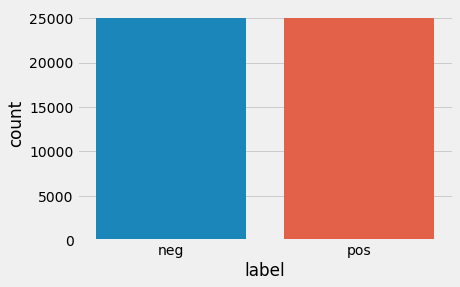

In [4]:
print("Initialising IMDB object")

imdb_deep_learning = IMDBSentiMentAnalysis(data,)

imdb_deep_learning.process_data()

# Using GRU

In [5]:
imdb_deep_learning.init_model(gru=True)

Initialising default model
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 32)           320000    
_________________________________________________________________
gru (GRU)                    (None, 32)                6336      
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 326,369
Trainable params: 326,369
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
1250/1250 [==============================] - 39s 32ms/step - loss: 0.3931 - acc: 0.8184 - val_loss: 0.5283 - val_acc: 0.7440
Epoch 2/10
1250/1250 [==============================] - 39s 31ms/step - loss: 0.2716 - acc: 0.8880 - val_loss: 0.8812 - val_acc: 0.6485
Epoch 3/10
1250/1250 [==============================] - 40s 32ms/step - loss: 0.2410 - acc: 0.9031 - val_loss: 0.4325 - val_acc: 0.8170
Epoch 4/10
1250/1250 [==============================] - 40s 32ms/step - loss: 0.2184 - acc: 0.9131 - val_loss: 0.4862 - val_acc: 0.8060
Epoch 5/10
1250/1250 [==============================] - 38s 31ms/step - loss: 0.2011 - acc: 0.9189 - val_loss: 0.6092 - val_acc: 0.7605
Epoch 6/10
1250/1250 [==============================] - 39s 31ms/step - loss: 0.1891 - acc: 0.9250 - val_loss: 0.4375 - val_acc: 0.8298
Epoch 7/10
1250/1250 [==============================] - 40s 32ms/step - loss: 0.1762 - acc: 0.9317 - val_loss: 0.4973 - val_acc: 0.8025
Epoch 8/10
1250/1250 [==========================

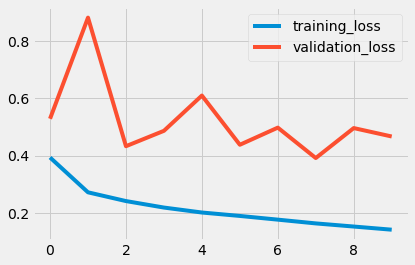

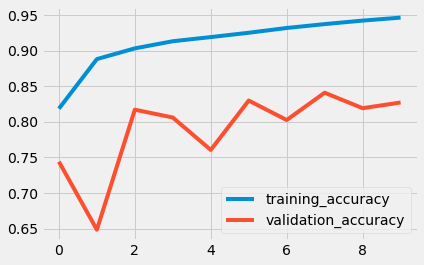

In [6]:
imdb_deep_learning.run_the_model(epochs = 10)

# USING LSTM

Initialising default model
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 32)           320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1250/1250 [==============================] - 41s 33ms/step - loss: 0.3737 - acc: 0.8309 - val_loss: 0.8078 - val_acc: 0.6864
Epoch 2/10
1250/1250 [==============================] - 41s 32ms/step - loss: 0.271

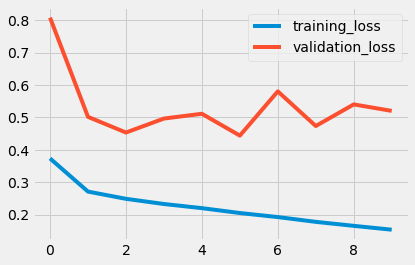

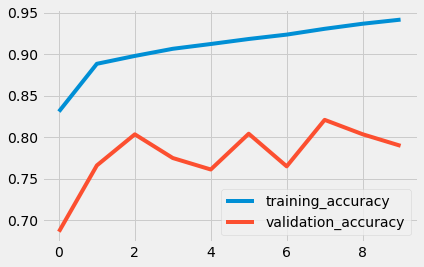

In [7]:
imdb_deep_learning.init_model(gru=False)
imdb_deep_learning.run_the_model(epochs = 10)

In [8]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS
from bs4 import BeautifulSoup
import re,string,unicodedata

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from xgboost.sklearn import XGBClassifier

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense,Input, Embedding,LSTM,Dropout,Conv1D, MaxPooling1D, GlobalMaxPooling1D,Dropout,Bidirectional,Flatten,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import transformers
import tokenizers

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [9]:
data=pd.read_csv('../input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
stop = stopwords.words('english')
wl = WordNetLemmatizer()
mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
           "'cause": "because", "could've": "could have", "couldn't": "could not", 
           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
           "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", 
           "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", 
           "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
           "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", 
           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have",
           "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
           "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
           "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
           "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
           "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", 
           "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
           "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
           "she's": "she is", "should've": "should have", "shouldn't": "should not", 
           "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is",
           "that'd": "that would", "that'd've": "that would have", "that's": "that is", 
           "there'd": "there would", "there'd've": "there would have", "there's": "there is", 
           "here's": "here is","they'd": "they would", "they'd've": "they would have", 
           "they'll": "they will", "they'll've": "they will have", "they're": "they are", 
           "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", 
           "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
           "we're": "we are", "we've": "we have", "weren't": "were not", 
           "what'll": "what will", "what'll've": "what will have","what're": "what are",  
           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", 
           "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
           "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", 
           "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
           "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
           "y'all're": "you all are","y'all've": "you all have","you'd": "you would", 
           "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", 
           "you're": "you are", "you've": "you have" }
#function to clean data
def clean_text(text,lemmatize = True):
    soup = BeautifulSoup(text, "html.parser") #remove html tags
    text = soup.get_text()
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")]) #expanding chatwords and contracts clearing contractions
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'',text)
    text = re.sub(r'\.(?=\S)', '. ',text) #add space after full stop
    text = re.sub(r'http\S+', '', text) #remove urls
    text = "".join([word.lower() for word in text if word not in string.punctuation]) #remove punctuation
    #tokens = re.split('\W+', text) #create tokens
    if lemmatize:
        text = " ".join([wl.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()]) #lemmatize
    else:
        text = " ".join([word for word in text.split() if word not in stop and word.isalpha()]) 
    return text
data_copy = data.copy()
data['review']=data['review'].apply(clean_text,lemmatize = True)
#converting target variable to numeric labels
data.label = [ 1 if each == "positive" else 0 for each in data.sentiment]
#after converting labels
data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:65: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter matteis love time money visually stunni...,positive


In [11]:
#splitting into train and test
data_copy['review']=data_copy['review'].apply(clean_text,lemmatize = False)
#converting target variable to numerical value
data_copy.sentiment = [ 1 if each == "positive" else 0 for each in data_copy.sentiment]
train, test= train_test_split(data_copy, test_size=0.2, random_state=42)
Xtrain, ytrain = train['review'], train['sentiment']
Xtest, ytest = test['review'], test['sentiment']

In [12]:
#set up the tokenizer
MAX_VOCAB_SIZE = 10000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE,oov_token="<oov>")
tokenizer.fit_on_texts(Xtrain)
word_index = tokenizer.word_index
#print(word_index)
V = len(word_index)
print("Vocabulary of the dataset is : ",V)

Vocabulary of the dataset is :  136734


In [13]:
##create sequences of reviews
seq_train = tokenizer.texts_to_sequences(Xtrain)
seq_test =  tokenizer.texts_to_sequences(Xtest)
#choice of maximum length of sequences
seq_len_list = [len(i) for i in seq_train + seq_test]

#if we take the direct maximum then
max_len=max(seq_len_list)
print('Maximum length of sequence in the list: {}'.format(max_len))

Maximum length of sequence in the list: 1406


In [14]:
# when setting the maximum length of sequence, variability around the average is used.
max_seq_len = np.mean(seq_len_list) + 2 * np.std(seq_len_list)
max_seq_len = int(max_seq_len)
print('Maximum length of the sequence when considering data only two standard deviations from average: {}'.format(max_seq_len))

Maximum length of the sequence when considering data only two standard deviations from average: 293


In [15]:
perc_covered = np.sum(np.array(seq_len_list) < max_seq_len) / len(seq_len_list)*100
print('The above calculated number coveres approximately {} % of data'.format(np.round(perc_covered,2)))

The above calculated number coveres approximately 94.53 % of data
